In [1]:
from matplotlib import pyplot as plt
import circle_fit as cf
import numpy as np
import time
import math
import random
import cv2
import os
%run functions.ipynb

## Functions

### Circle-fixer  有問題

In [3]:
## Assume the target circle is the largest object

def getTarget(img):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
    list_len = [len(i) for i in contours]
        
    max_len = 0
    index = 0
    for i,l in enumerate(list_len):
        if l > max_len:
            max_len = l
            index = i
            
    target = contours[index]
    target = np.asarray(target).reshape(max_len, 2)

    return target

# os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
# img, gray = read_img("10_mean_0.bmp")
# height, width = get_imgInfo(img)
# threshed = removeBorder(gray, height, width)

# target = getTarget(threshed)

# print(target)

In [ ]:
img, gray = read_img("10_mean_0.bmp")
height, width = get_imgInfo(img)
thr = removeBorder(gray, height, width)

_, threshed = cv2.threshold(gray, thr,255,cv2.THRESH_BINARY_INV)

target = getTarget(threshed)
print(target)

cv2.imshow("Thresh", threshed)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Test

In [8]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
# Read image
img, gray = read_img("10_mean_30.bmp")
height, width = get_imgInfo(img)


# Image processing
blur = cv2.GaussianBlur(img,(5,5),0)
dst = cv2.fastNlMeansDenoisingColored(blur,None,10,10,7,21)

gray2 = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
_, threshed = cv2.threshold(gray2,0 ,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



# Options

# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
closed = closing(median, 3)
opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)

# get all target points
target_points = []
# for i in range(height):
#     for j in range(width):
#         if median[i,j] == 255:
#             target_points.append((i,j))
            

    
# Show processed images    
# cv2.imshow("Original", img)
cv2.imshow("Gray", gray)
cv2.imshow("Blur", blur)
cv2.imshow("Non Local Means", dst)
cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        sharpened = cv2.filter2D(img, -1, 1)
        
        blur = cv2.GaussianBlur(sharpened,(5,5),0)
        dst = cv2.fastNlMeansDenoisingColored(blur,None,5,5,5,15)
        gray2 = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
        _, threshed = cv2.threshold(gray2,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         threshed = removeBorder(gray2, height, width)
        median = median_filter(threshed, 25)
#         closed = closing(median, 2)
#         opened = opening(closed, 3)
        edge = edge_detect(median, 0, 20)

        # get all target points
        target_points = []
        for i in range(height):
            for j in range(width):
                if median[i,j] == 255:
                    target_points.append((i,j))
                    
#         # get edge points
#         edge_points = []
#         for i in range(height):
#             for j in range(width):
#                 if edge[i,j] == 255:
#                     edge_points.append((i,j))
        
#         target = getTarget(median)
#         target_points = []
#         for p in target:
#             target_points.append((p[1],p[0]))


        
        
        # Count center
        cy,cx,r,_ = cf.least_squares_circle((target_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 203.6999621846368, 101.38666416138169
10_mean_1.bmp: 203.76015052166616, 101.34632607519836
10_mean_10.bmp: 203.78301893904992, 101.18916311367839
10_mean_11.bmp: 203.71279305935172, 101.24548376680295
10_mean_12.bmp: 203.68562505311286, 101.29497782334985
10_mean_13.bmp: 203.66317614398915, 101.19906853225349
10_mean_14.bmp: 203.62425401982836, 101.32625433628326
10_mean_15.bmp: 203.6518516425649, 101.31625804587318
10_mean_16.bmp: 203.66637172013907, 101.25730018830745
10_mean_17.bmp: 203.74631661851342, 101.34594967173925
10_mean_18.bmp: 203.57385226801028, 101.14901733107364
10_mean_19.bmp: 203.6723224759974, 101.25752120309097
10_mean_2.bmp: 203.54651251264215, 101.09578412747457
10_mean_20.bmp: 203.58112719074475, 101.21319936173288
10_mean_21.bmp: 203.66593608512184, 101.3213778150171
10_mean_22.bmp: 203.60352494426678, 101.25999562418346
10_mean_23.bmp: 203.74800085351117, 101.24787918939664
10_mean_24.bmp: 203.87588397395604, 101.18871986545622
10_mean_25.bmp: 2

In [3]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (203.72307, 101.27024)
Variance     : (0.00846, 0.01280)
Max Length   : 0.41279, 0.45411 (pixels)


In [7]:
def swift_algo(gray, Lambda=3, Gamma=2):
    ## Step 1: Image normalization
    norm = gray/255
    
    ## Step 2: Comupte u series from normalized image
    u = np.log(1+norm)
    u_avg = np.mean(u)
    u_std = np.std(u)
    
    ## Step 3: Compute ...
    v = np.power(u, Lambda)/Lambda
    f = np.power( np.exp( (np.tan(u)-u_std) / (np.exp(u)-v)), Gamma)
    
    ## Step 4: Redefine distrubution
    t = (f-np.min(f)) / (np.max(f)-np.min(f))
    final = (t*255).astype('uint8')
    
    return final

## Case1_1

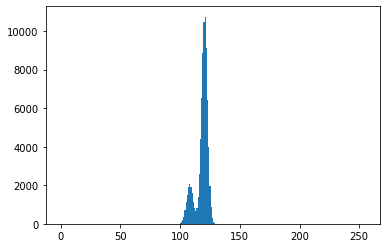

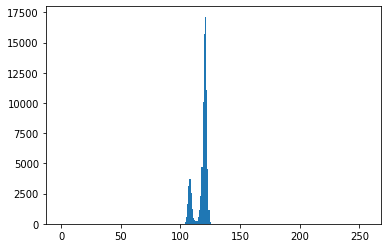

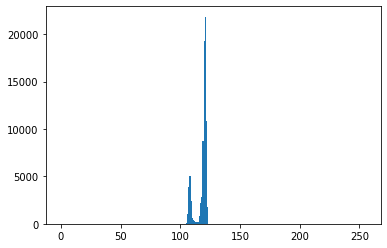

In [4]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
## Read image
img, gray = read_img("10_mean_90.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)



## Options
# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
# closed = closing(median, 3)
# opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            

## Show processed images    
# cv2.imshow("Original", img)
cv2.imshow("Gray", gray)
cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
cv2.imshow("Thresh", threshed)
cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_1/Cut")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        blur = cv2.GaussianBlur(gray,(5,5),0)
        cEn = swift_algo(blur, Lambda=3, Gamma=2)
        dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
        _, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        median = median_filter(threshed, 25)
        edge = edge_detect(median, 0, 20)

        # get all target points
#         target_points = []
#         for i in range(height):
#             for j in range(width):
#                 if median[i,j] == 255:
#                     target_points.append((i,j))
                    
        # get edge points
        edge_points = []
        for i in range(height):
            for j in range(width):
                if edge[i,j] == 255:
                    edge_points.append((i,j))
        


        # Count center
        cy,cx,r,_ = cf.least_squares_circle((edge_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 203.544970639306, 99.17125426648212
10_mean_1.bmp: 203.59793552834677, 99.17914707160605
10_mean_10.bmp: 203.6299796944454, 98.99459254483605
10_mean_11.bmp: 203.6007614669837, 99.10678428180002
10_mean_12.bmp: 203.46309113368977, 99.12768020779643
10_mean_13.bmp: 203.5457162783877, 99.0994985025225
10_mean_14.bmp: 203.49572633239922, 99.1756977033241
10_mean_15.bmp: 203.4753184236301, 99.07287627707551
10_mean_16.bmp: 203.48611021891216, 99.18230523120774
10_mean_17.bmp: 203.53978020915386, 99.14528485980075
10_mean_18.bmp: 203.4819394017604, 99.02168840307075
10_mean_19.bmp: 203.52589680073473, 99.07902262073414
10_mean_2.bmp: 203.38783320414365, 98.96349405176504
10_mean_20.bmp: 203.36435952946854, 99.0011484891006
10_mean_21.bmp: 203.5151154534553, 99.09920350447157
10_mean_22.bmp: 203.46558579502667, 99.04496350926297
10_mean_23.bmp: 203.5118658052311, 99.0996471105475
10_mean_24.bmp: 203.67472221823772, 99.07769920638255
10_mean_25.bmp: 203.6695680251425, 99.168216

In [14]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (202.95434, 99.22610)
Variance     : (5.11211, 0.61563)
Max Length   : 15.24822, 7.46387 (pixels)


## Case2_1

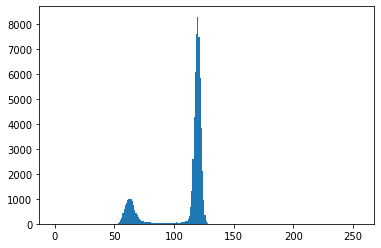

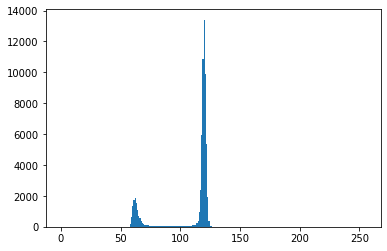

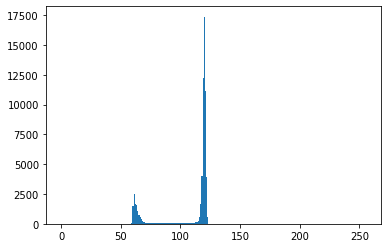

True

In [16]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_2/Cut")
## Read image
img, gray = read_img("10_mean_90.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



## Options
# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
closed = closing(median, 3)
opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            
fileName = "/home/mj/Pictures/Histogram/Case2-1/{}.bmp".format(90)
cv2.imwrite(fileName, threshed)    
    
## Show processed images    
# cv2.imshow("Original", img)
# cv2.imshow("Gray", gray)
# cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
# cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [82]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_2/Cut")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        blur = cv2.GaussianBlur(gray,(5,5),0)
        dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
        _, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         threshed = removeBorder(gray2, height, width)
        median = median_filter(threshed, 25)
        edge = edge_detect(median, 0, 20)

        # get all target points
        target_points = []
        for i in range(height):
            for j in range(width):
                if median[i,j] == 255:
                    target_points.append((i,j))
                    
#         # get edge points
#         edge_points = []
#         for i in range(height):
#             for j in range(width):
#                 if edge[i,j] == 255:
#                     edge_points.append((i,j))
        
#         target = getTarget(median)
#         target_points = []
#         for p in target:
#             target_points.append((p[1],p[0]))


        # Count center
        cy,cx,r,_ = cf.least_squares_circle((target_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 184.33996320962962, 90.4126600890036
10_mean_1.bmp: 184.33273240009783, 90.42233242561191
10_mean_10.bmp: 184.29970844632507, 90.43071617001934
10_mean_11.bmp: 184.35314870110247, 90.41102355650702
10_mean_12.bmp: 184.3378921741837, 90.43244014921235
10_mean_13.bmp: 184.35863102160457, 90.3988587419344
10_mean_14.bmp: 184.33916404005993, 90.4624366306039
10_mean_15.bmp: 184.33936468741763, 90.33831123772237
10_mean_16.bmp: 184.34267557577436, 90.43531169410154
10_mean_17.bmp: 184.36601562333095, 90.43091045707729
10_mean_18.bmp: 184.32103372617263, 90.40793527431865
10_mean_19.bmp: 184.34508764153512, 90.45077616450543
10_mean_2.bmp: 184.35584190901636, 90.45318317152872
10_mean_20.bmp: 184.37030306092748, 90.44502111504698
10_mean_21.bmp: 184.3471747958868, 90.42572926447974
10_mean_22.bmp: 184.33495019095886, 90.41017335399465
10_mean_23.bmp: 184.32051050943477, 90.43977071070012
10_mean_24.bmp: 184.39232845938227, 90.42650237684178
10_mean_25.bmp: 184.34053211287477, 

In [83]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (184.35104, 90.43959)
Variance     : (0.00077, 0.00090)
Max Length   : 0.12710, 0.14237 (pixels)


## Case2_2

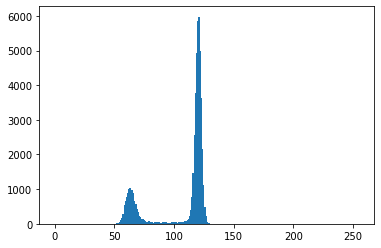

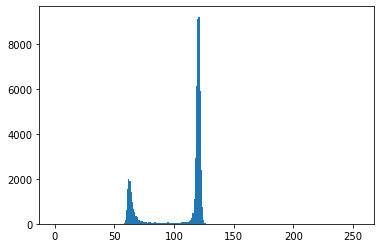

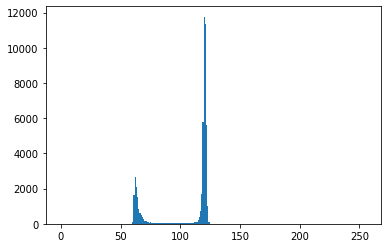

In [20]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_2/Cut_2")
## Read image
img, gray = read_img("10_mean_87.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



## Options
# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
closed = closing(median, 3)
opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            

    
## Show processed images    
# cv2.imshow("Original", img)
# cv2.imshow("Gray", gray)
# cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
# cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [84]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_2/Cut_2")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        blur = cv2.GaussianBlur(gray,(5,5),0)
        dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
        _, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         threshed = removeBorder(gray2, height, width)
        median = median_filter(threshed, 25)
        edge = edge_detect(median, 0, 20)

        # get all target points
        target_points = []
        for i in range(height):
            for j in range(width):
                if median[i,j] == 255:
                    target_points.append((i,j))
                    
#         # get edge points
#         edge_points = []
#         for i in range(height):
#             for j in range(width):
#                 if edge[i,j] == 255:
#                     edge_points.append((i,j))
        
#         target = getTarget(median)
#         target_points = []
#         for p in target:
#             target_points.append((p[1],p[0]))


        # Count center
        cy,cx,r,_ = cf.least_squares_circle((target_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 158.1148618031052, 82.30404361641786
10_mean_1.bmp: 158.18934513590378, 82.31407711530794
10_mean_10.bmp: 158.09202265669364, 82.34894847408496
10_mean_11.bmp: 158.11363511612947, 82.36129471893479
10_mean_12.bmp: 158.17116703044562, 82.27153414923056
10_mean_13.bmp: 158.17964876183385, 82.35553015859533
10_mean_14.bmp: 158.16445422560298, 82.34433684318783
10_mean_15.bmp: 158.10373878931725, 82.29786886659109
10_mean_16.bmp: 158.15688279282128, 82.3525852342038
10_mean_17.bmp: 158.13795631087922, 82.32415138312425
10_mean_18.bmp: 158.18879727690017, 82.33268096661686
10_mean_19.bmp: 158.0962175835294, 82.30337750104738
10_mean_2.bmp: 158.163958784141, 82.29994819834553
10_mean_20.bmp: 158.1194292248171, 82.33366394266366
10_mean_21.bmp: 158.12744385556184, 82.38014811169204
10_mean_22.bmp: 158.19446617600246, 82.35569187671076
10_mean_23.bmp: 158.12175767319093, 82.33858975885728
10_mean_24.bmp: 158.15495766671765, 82.31701203468504
10_mean_25.bmp: 158.14869419415476, 8

In [85]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (158.15759, 82.34575)
Variance     : (0.00109, 0.00199)
Max Length   : 0.14833, 0.25204 (pixels)


## Case3_1

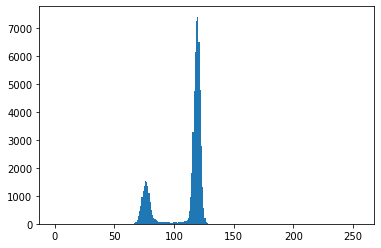

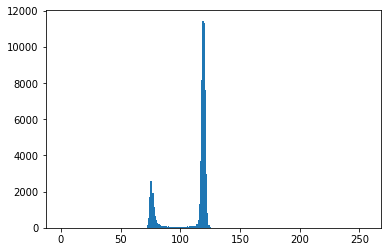

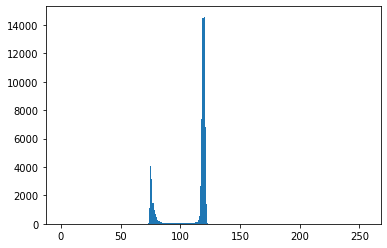

In [21]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_3/Cut")
## Read image
img, gray = read_img("10_mean_87.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



## Options
# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
closed = closing(median, 3)
opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            

    
## Show processed images    
# cv2.imshow("Original", img)
# cv2.imshow("Gray", gray)
# cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
# cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [69]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_3/Cut")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        blur = cv2.GaussianBlur(gray,(5,5),0)
        dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
        _, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         threshed = removeBorder(gray2, height, width)
        median = median_filter(threshed, 25)
        edge = edge_detect(median, 0, 20)

        # get all target points
        target_points = []
        for i in range(height):
            for j in range(width):
                if median[i,j] == 255:
                    target_points.append((i,j))
                    
#         # get edge points
#         edge_points = []
#         for i in range(height):
#             for j in range(width):
#                 if edge[i,j] == 255:
#                     edge_points.append((i,j))
        
#         target = getTarget(median)
#         target_points = []
#         for p in target:
#             target_points.append((p[1],p[0]))


        # Count center
        cy,cx,r,_ = cf.least_squares_circle((target_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 174.87647116757995, 96.10523455858778
10_mean_1.bmp: 174.78410148457303, 96.13263426134951
10_mean_10.bmp: 174.82011584582017, 96.10056987953116
10_mean_11.bmp: 174.92617116032054, 96.01666318354398
10_mean_12.bmp: 174.81669722622362, 96.10954627994123
10_mean_13.bmp: 174.86404004555598, 96.1048940059957
10_mean_14.bmp: 174.8331897396372, 96.09014392393965
10_mean_15.bmp: 174.87167455369826, 96.12584174021605
10_mean_16.bmp: 174.8983616658588, 96.02529951670469
10_mean_17.bmp: 174.88281185274863, 96.04648627727552
10_mean_18.bmp: 174.87968381111136, 96.09921663379224
10_mean_19.bmp: 174.90173936968034, 96.10068115598786
10_mean_2.bmp: 174.88544452910187, 96.09879915420505
10_mean_20.bmp: 174.7766053792461, 96.13489266226622
10_mean_21.bmp: 174.89302326486296, 96.14967268418631
10_mean_22.bmp: 174.80984239834103, 96.17791176490783
10_mean_23.bmp: 174.87652768615942, 96.19662981669065
10_mean_24.bmp: 174.84893979394246, 96.20901457114368
10_mean_25.bmp: 174.85738882652637,

In [70]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (174.85771, 96.14106)
Variance     : (0.00157, 0.00361)
Max Length   : 0.18512, 0.22115 (pixels)


## Case3_2

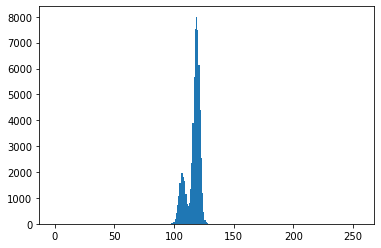

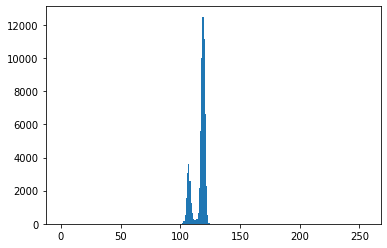

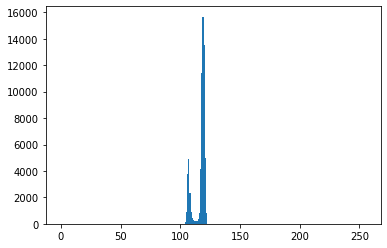

In [22]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_3/Cut_2")
## Read image
img, gray = read_img("10_mean_87.bmp")
height, width = get_imgInfo(img)
plt.hist(gray.ravel(), bins=256, range=[0, 255])
plt.show()

## Image processing
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.hist(blur.ravel(), bins=256, range=[0, 255])
plt.show()

dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
plt.hist(dst.ravel(), bins=256, range=[0, 255])
plt.show()

_, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# threshed = threshold_moment_preserving(img, gray)
# threshed = removeBorder(gray2, height, width)



## Options
# opened = opening(threshed, 5)
median = median_filter(threshed, 25)
closed = closing(median, 3)
opened = opening(closed, 3)
# edge = edge_detect(median, 0, 20)
            

    
## Show processed images    
# cv2.imshow("Original", img)
# cv2.imshow("Gray", gray)
# cv2.imshow("Blur", blur)
# cv2.imshow("Non Local Means", dst)
# cv2.imshow("Thresh", threshed)
# cv2.imshow("Median", median)
# cv2.imshow("Opening", opened)
# cv2.imshow("Closing", closed)
# cv2.imshow("Edge", edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [15]:
os.chdir("/home/mj/HardDisk/ARCS/img/X-Ray/Case_3/Cut_2")
try:
    
    images = os.listdir()
    images.sort()
    
    predictions = []
    for image in images:
        img, gray = read_img(image)
        height, width = get_imgInfo(img)
        
        blur = cv2.GaussianBlur(gray,(5,5),0)
        dst = cv2.fastNlMeansDenoising(blur,None,5,3,9)
        _, threshed = cv2.threshold(dst,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#         threshed = removeBorder(gray2, height, width)
        median = median_filter(threshed, 25)
        edge = edge_detect(median, 0, 20)

        # get all target points
        target_points = []
        for i in range(height):
            for j in range(width):
                if median[i,j] == 255:
                    target_points.append((i,j))
                    
#         # get edge points
#         edge_points = []
#         for i in range(height):
#             for j in range(width):
#                 if edge[i,j] == 255:
#                     edge_points.append((i,j))
        
#         target = getTarget(median)
#         target_points = []
#         for p in target:
#             target_points.append((p[1],p[0]))


        # Count center
        cy,cx,r,_ = cf.least_squares_circle((target_points))
        predictions.append([cx, cy])
        print("{}: {}, {}".format(image ,cx, cy))

    
except Exception as e:
    print(e)

10_mean_0.bmp: 181.43278469157175, 96.64037503307205
10_mean_1.bmp: 181.61446845651068, 96.80372763726542
10_mean_10.bmp: 181.71270069086367, 96.86353607552496
10_mean_11.bmp: 181.82342698385116, 96.62362152032873
10_mean_12.bmp: 181.4974118702794, 96.87360392451774
10_mean_13.bmp: 181.5547863173287, 96.59658144584719
10_mean_14.bmp: 181.7169740692861, 96.90769540320548
10_mean_15.bmp: 181.6457451792748, 96.73523053105048
10_mean_16.bmp: 181.79776576075488, 96.69305340922442
10_mean_17.bmp: 181.9540962863, 96.71609534853786
10_mean_18.bmp: 181.8387542390774, 96.72687582745144
10_mean_19.bmp: 181.70401353251137, 96.62744003659229
10_mean_2.bmp: 181.91266016697205, 96.5649486360903
10_mean_20.bmp: 181.63447301000699, 96.85112242686952
10_mean_21.bmp: 181.6159139346252, 96.6109924266787
10_mean_22.bmp: 181.67961936514922, 96.71655739030055
10_mean_23.bmp: 181.52356498920443, 96.85528095595663
10_mean_24.bmp: 181.64948820888227, 96.9267162393145
10_mean_25.bmp: 181.7177853805241, 96.724451

In [16]:
show_resoult(predictions)

-----------------------------------------------------
Statistics: 
Mean Centroid: (181.69362, 96.79790)
Variance     : (0.01451, 0.01443)
Max Length   : 0.57376, 0.48922 (pixels)
